Predictive Analytics menggunakan Data Weather Type Classification


# Data Loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# Load data
!pip install kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d nikhil7280/weather-type-classification
!unzip weather-type-classification.zip


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/nikhil7280/weather-type-classification
License(s): other
  0% 0.00/186k [00:00<?, ?B/s]
100% 186k/186k [00:00<00:00, 63.9MB/s]
Archive:  weather-type-classification.zip
  inflating: weather_classification_data.csv  


In [3]:
# Membuat dataset bernama cuaca
cuaca = pd.read_csv('weather_classification_data.csv')
cuaca.head()

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy

# Exploratory Data Analysis

In [4]:
cuaca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


Data yang digunakan berasal dari kaggle dengan judul "Weather Type Classification" yang dapat di unduh [disini](https://www.kaggle.com/datasets/nikhil7280/weather-type-classification).

Variabel yang terdapat pada dataset adalah sebagai berikut:

- `Temperature` (numeric) : Temperatur suhu dalam celcius
- `Humidity` (numeric) : Presentase Kelembaban
- `Wind Speed` (numeric) : Kecepatan angin dalam kilometer/jam
- `Precipitation (%)` (numeric) : Presentase curah hujan
- `Cloud Cover` (categorical) : Deskripsi tutupan awan yang berisi clear, cloudy, overcast dan party cloudy
- `Atmospheric Pressure` (numeric) : Tekanan atmosfer dalam hPa
- `UV index` (numeric) : Indeks UX yang menunjukkan kekuatan radiasi UV
- `Season` (categorical) : Jenis musim mulai dari Autumn, Spring, Summer dan Winter
- `Visibility` (km) (numeric) : Jarak pandang dalam km
- `Location` (categorical) : Lokasi dimana data di ambil seperti coastal, inland dan muntain
- `Weather Type` (categorical) : Jenis cuaca yang berisi Cloudy, Rainy, Snowy dan Sunny (Target Klasifikasi)

Totalnya ada 11 variabel dengan jumlah 13200 data

In [5]:
# Cek nilai duplikat pada data
duplicate_rows = cuaca[cuaca.duplicated()]
print("Jumlah baris duplikat:", duplicate_rows.shape[0])

Jumlah baris duplikat: 0


Berdasarkan hasil pengecekan tidak ditemukan nilai duplikat

In [6]:
# Cek nilai kosong pada data
print(cuaca.isnull().sum())

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


Berdasarkan pengecekan juga, tidak ditemukan data yang kosong

## Univariate Analysis

Univariate Analysis adalah jenis analisis data yang memeriksa satu variabel saja. Tujuannya uuntuk menggambarkan data dan menemukan pola distribusi data

Sebelum mulai analysis kita bagi datanya menjadi 2 bagian, yakni `numerical_fitur` untuk data numerik dan `categorical_features` untuk data kategorik

In [7]:
# bagi menjadi 2 fitur
numerical_features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
categorical_features = ['Cloud Cover', 'Season', 'Location', 'Weather Type']


### Categorical Features

               jumlah sampel  persentase
Cloud Cover                             
overcast                6090        46.1
partly cloudy           4560        34.5
clear                   2139        16.2
cloudy                   411         3.1


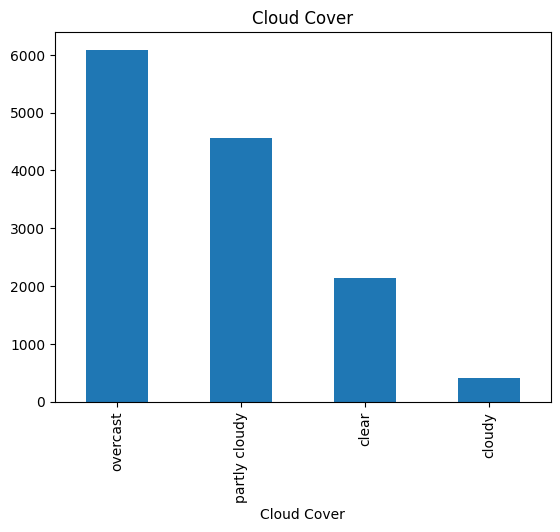

In [8]:
# Fitur CLoud Cover
feature = categorical_features[0]
count = cuaca[feature].value_counts()
percent = 100*cuaca[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan grafik pada fitur `Cloud Cover` di atas:
- `overcast` memiliki 6090 data
- `party cloud` memiliki 4560 data
- `clear` memiliki 2139 data
- `cloudy` memiliki 411 data

        jumlah sampel  persentase
Season                           
Winter           5610        42.5
Spring           2598        19.7
Autumn           2500        18.9
Summer           2492        18.9


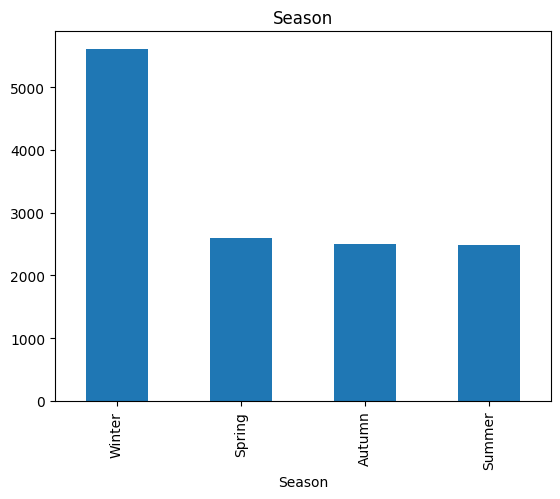

In [9]:
# Fitur Season
feature = categorical_features[1]
count = cuaca[feature].value_counts()
percent = 100*cuaca[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan grafik pada fitur `Season` di atas:
- `winter` memiliki 5610 data
- `Spring` memiliki 2598 data
- `Autumn` memiliki 2500 data
- `Summer` memiliki 2492 data

          jumlah sampel  persentase
Location                           
inland             4816        36.5
mountain           4813        36.5
coastal            3571        27.1


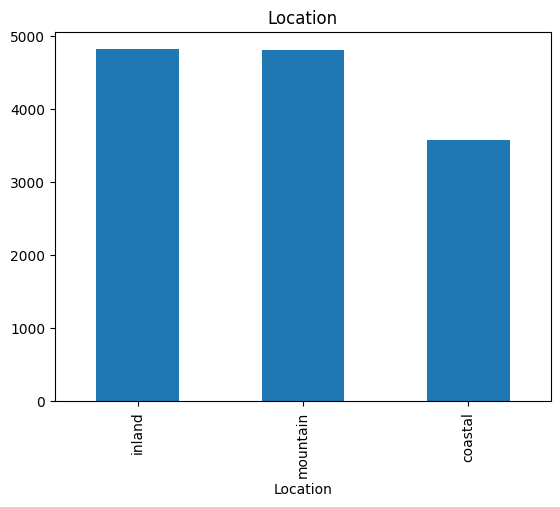

In [10]:
# Fitur Location
feature = categorical_features[2]
count = cuaca[feature].value_counts()
percent = 100*cuaca[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan grafik pada fitur `Location` di atas:
- `inland` memiliki 4816 data
- `mountain` memiliki 4813 data
- `coastal` memiliki 3571 data

              jumlah sampel  persentase
Weather Type                           
Rainy                  3300        25.0
Cloudy                 3300        25.0
Sunny                  3300        25.0
Snowy                  3300        25.0


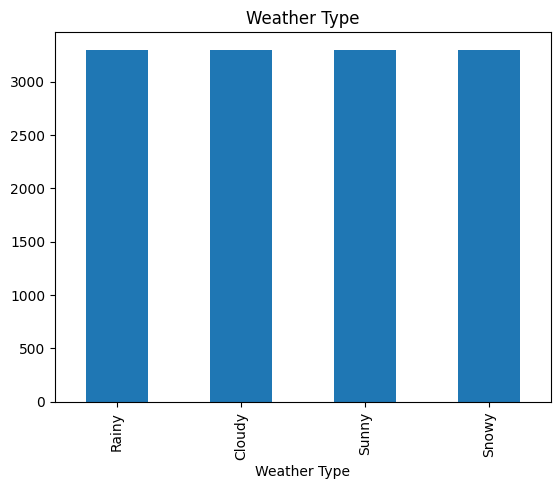

In [11]:
# Fitur Weather Type
feature = categorical_features[3]
count = cuaca[feature].value_counts()
percent = 100*cuaca[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan grafik pada fitur `Weather Type` di atas, nilai pada kolom ini terlihat seimbang dengan rincian sebagai berikut:
- `Rainy` memiliki 3300 data
- `Cluody` memiliki 3300 data
- `Sunny` memiliki 3300 data
- `Snowy` memiliki 3300 data

### Numerical Features

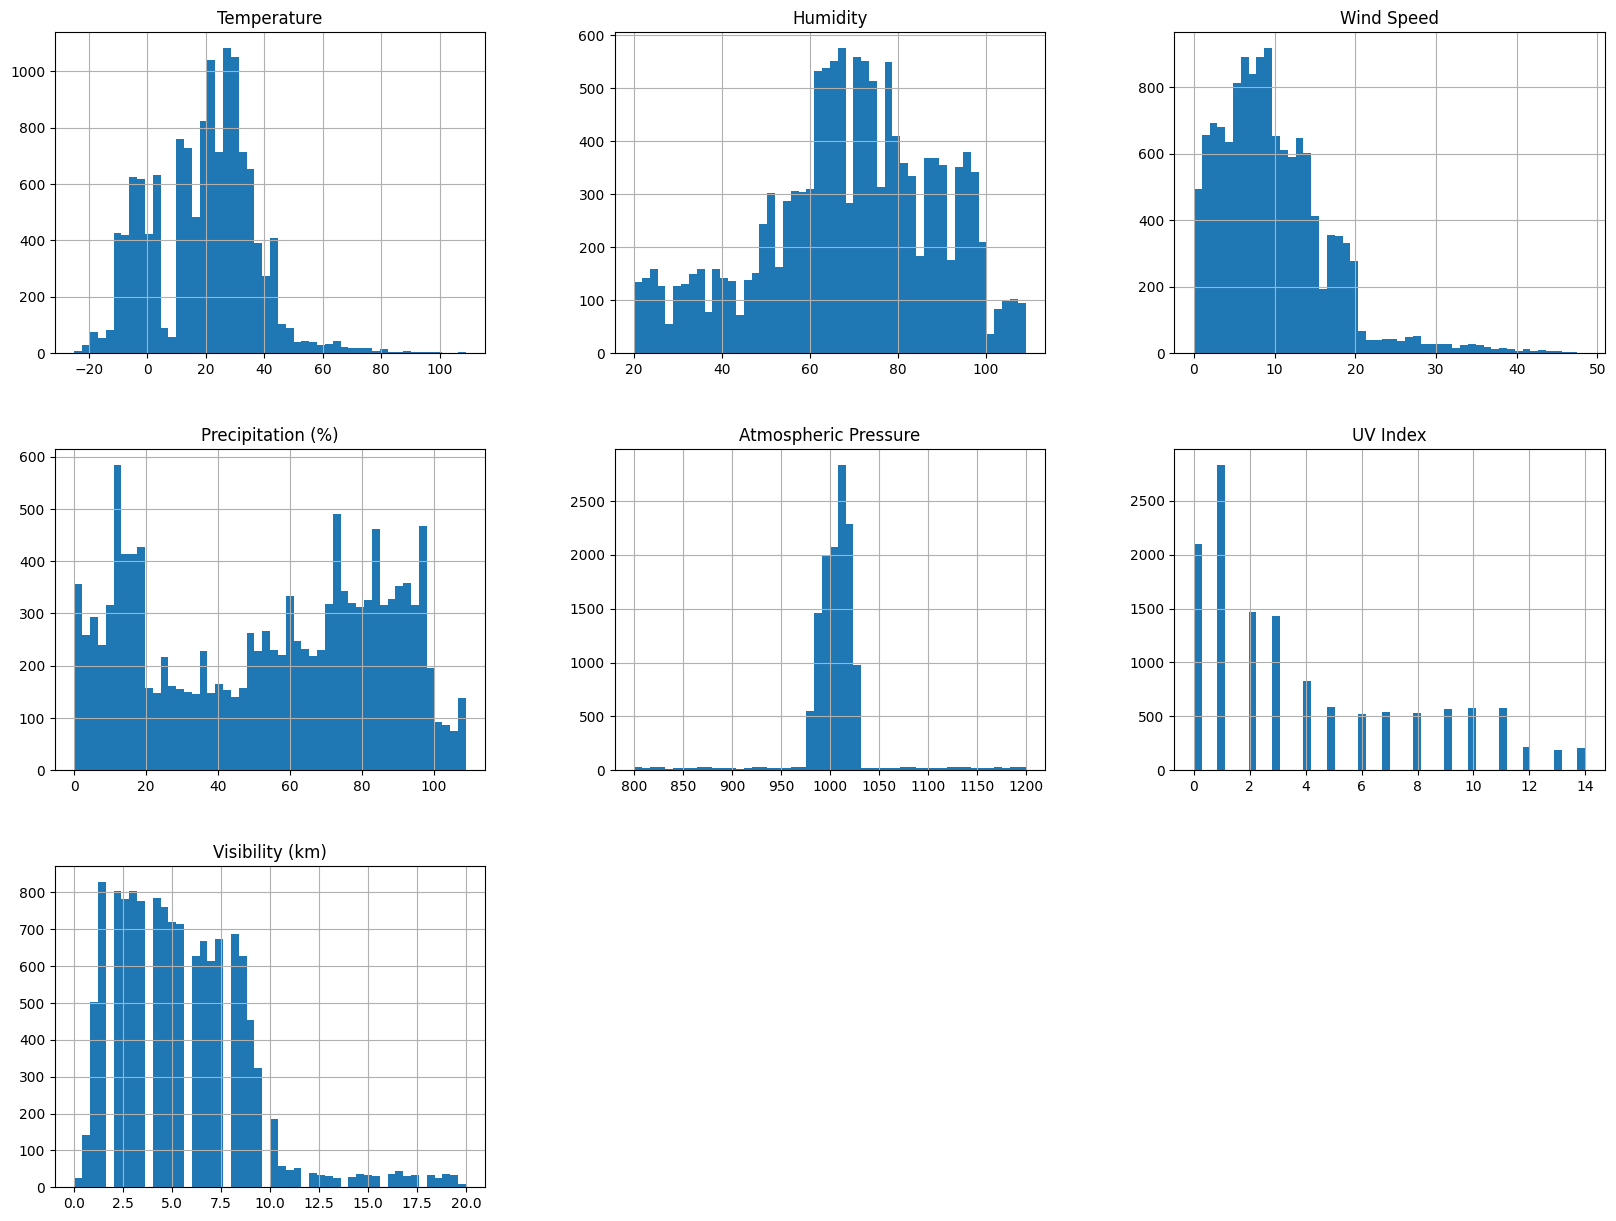

In [12]:
cuaca.hist(bins=50, figsize=(20,15))
plt.show()

Berdasarkan grafik diatas, hampir semmua kolom skewnessnya mengarah ke kiri kecuali `Humidity`, `Precipitaion (%)` dan `Atmospheric Pressure`.

## Multivariate Analysis

Multivariate Analysis menunjukkan hubungan antara dua atau lebih variabel pada data. Multivariate Analysis yang menunjukkan hubungan antara dua variabel biasa disebut sebagai bivariate Analysis. Selanjutnya, kita akan melakukan analisis data pada fitur kategori dan numerik.

### Categorical Features

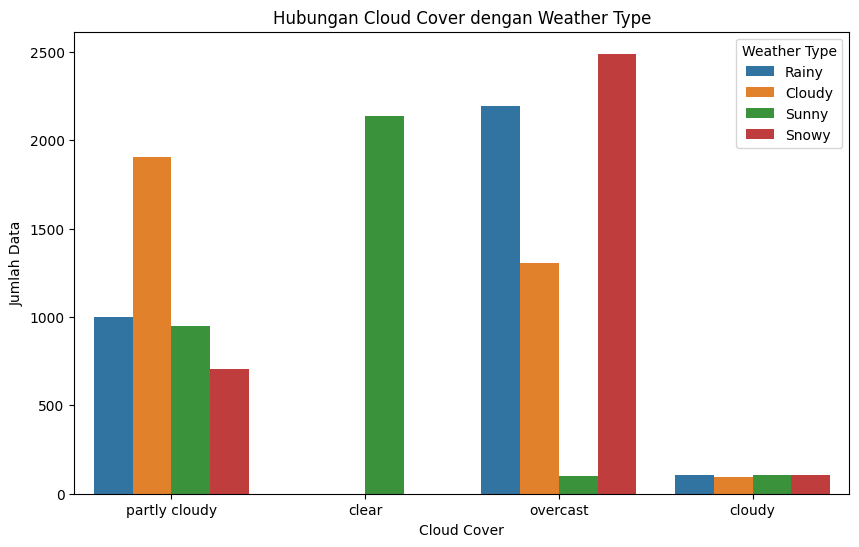

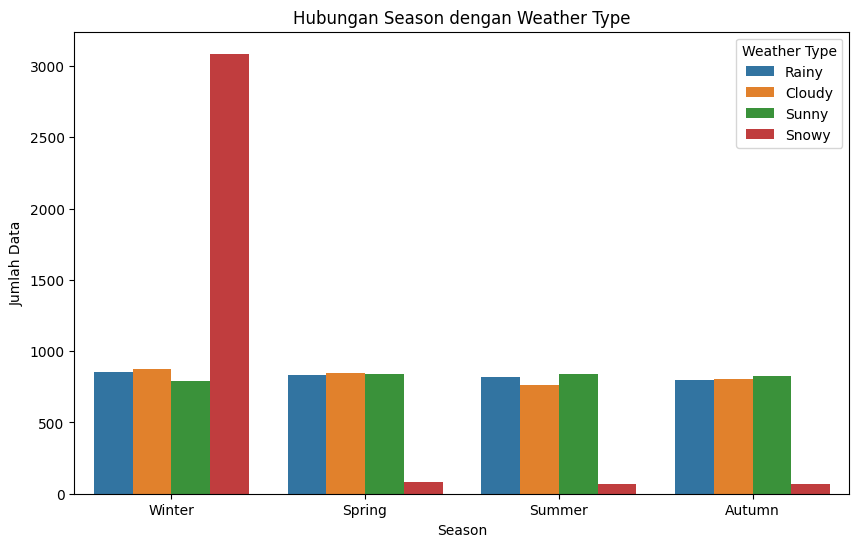

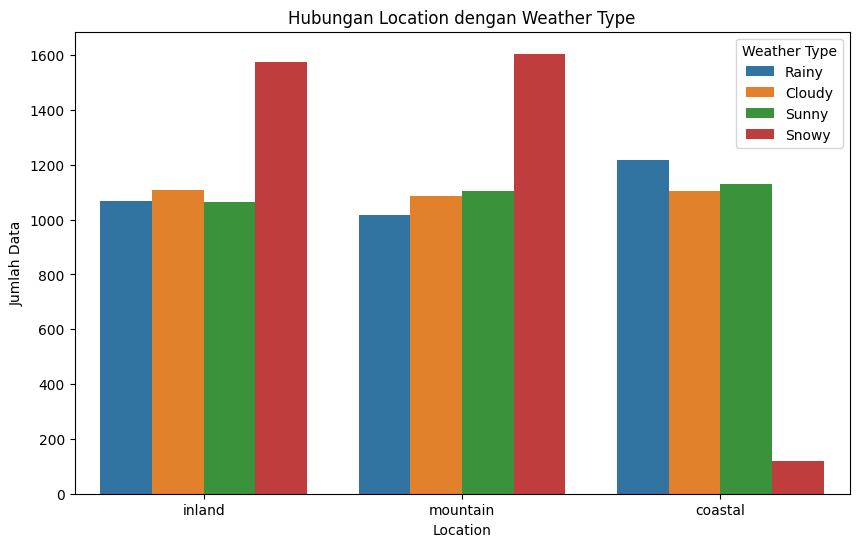

In [13]:
for feature in categorical_features[:-1]:
  plt.figure(figsize=(10, 6))
  sns.countplot(x=feature, hue='Weather Type', data=cuaca)
  plt.title(f'Hubungan {feature} dengan Weather Type')
  plt.xlabel(feature)
  plt.ylabel('Jumlah Data')
  plt.legend(title='Weather Type')
  plt.show()


Berdasarkan grafik di atas didapatn:
-  Pada Fitur `Cloud Cover`
  1. Pada `party cloudy` jumlah `Coudy` menjadi yang terbanyak hampir mendekati 2000 data
  2. pada `Clear` semua nilainya diisi dengan tipe `Sunny`
  3. pada `overccast` nilia terendahnya adda pada `Sunny` dan yang terbanyak adalah `Rainy` dan `Snowy`
  4. pada `cludy`, hampr semua datanya rata

- Pada fitur `Season`
  1. pada `winter` jumlah `Snowy` menjadi yang paling besar melebihi 3000 data, sedangkan yang lain ada di bawah 1000 data
  2. pada `Spring`, `Summer` dan `Autumn` datanya hampir rata antara 500 - 1000 data kecuali pada data `Snowy` yang jumlahnya sangat sedikit

- Pada fitur `Location`
  1. pada `inland` dan `mountain` jumlah datanya hampir sama dengan data tertinggi ada pada `Snowy`
  2. Sedangkan pada `coastal`, data `Snowy` menjdai yang terendah dengan jumlah kurang dari 200 data

### Numerical Features

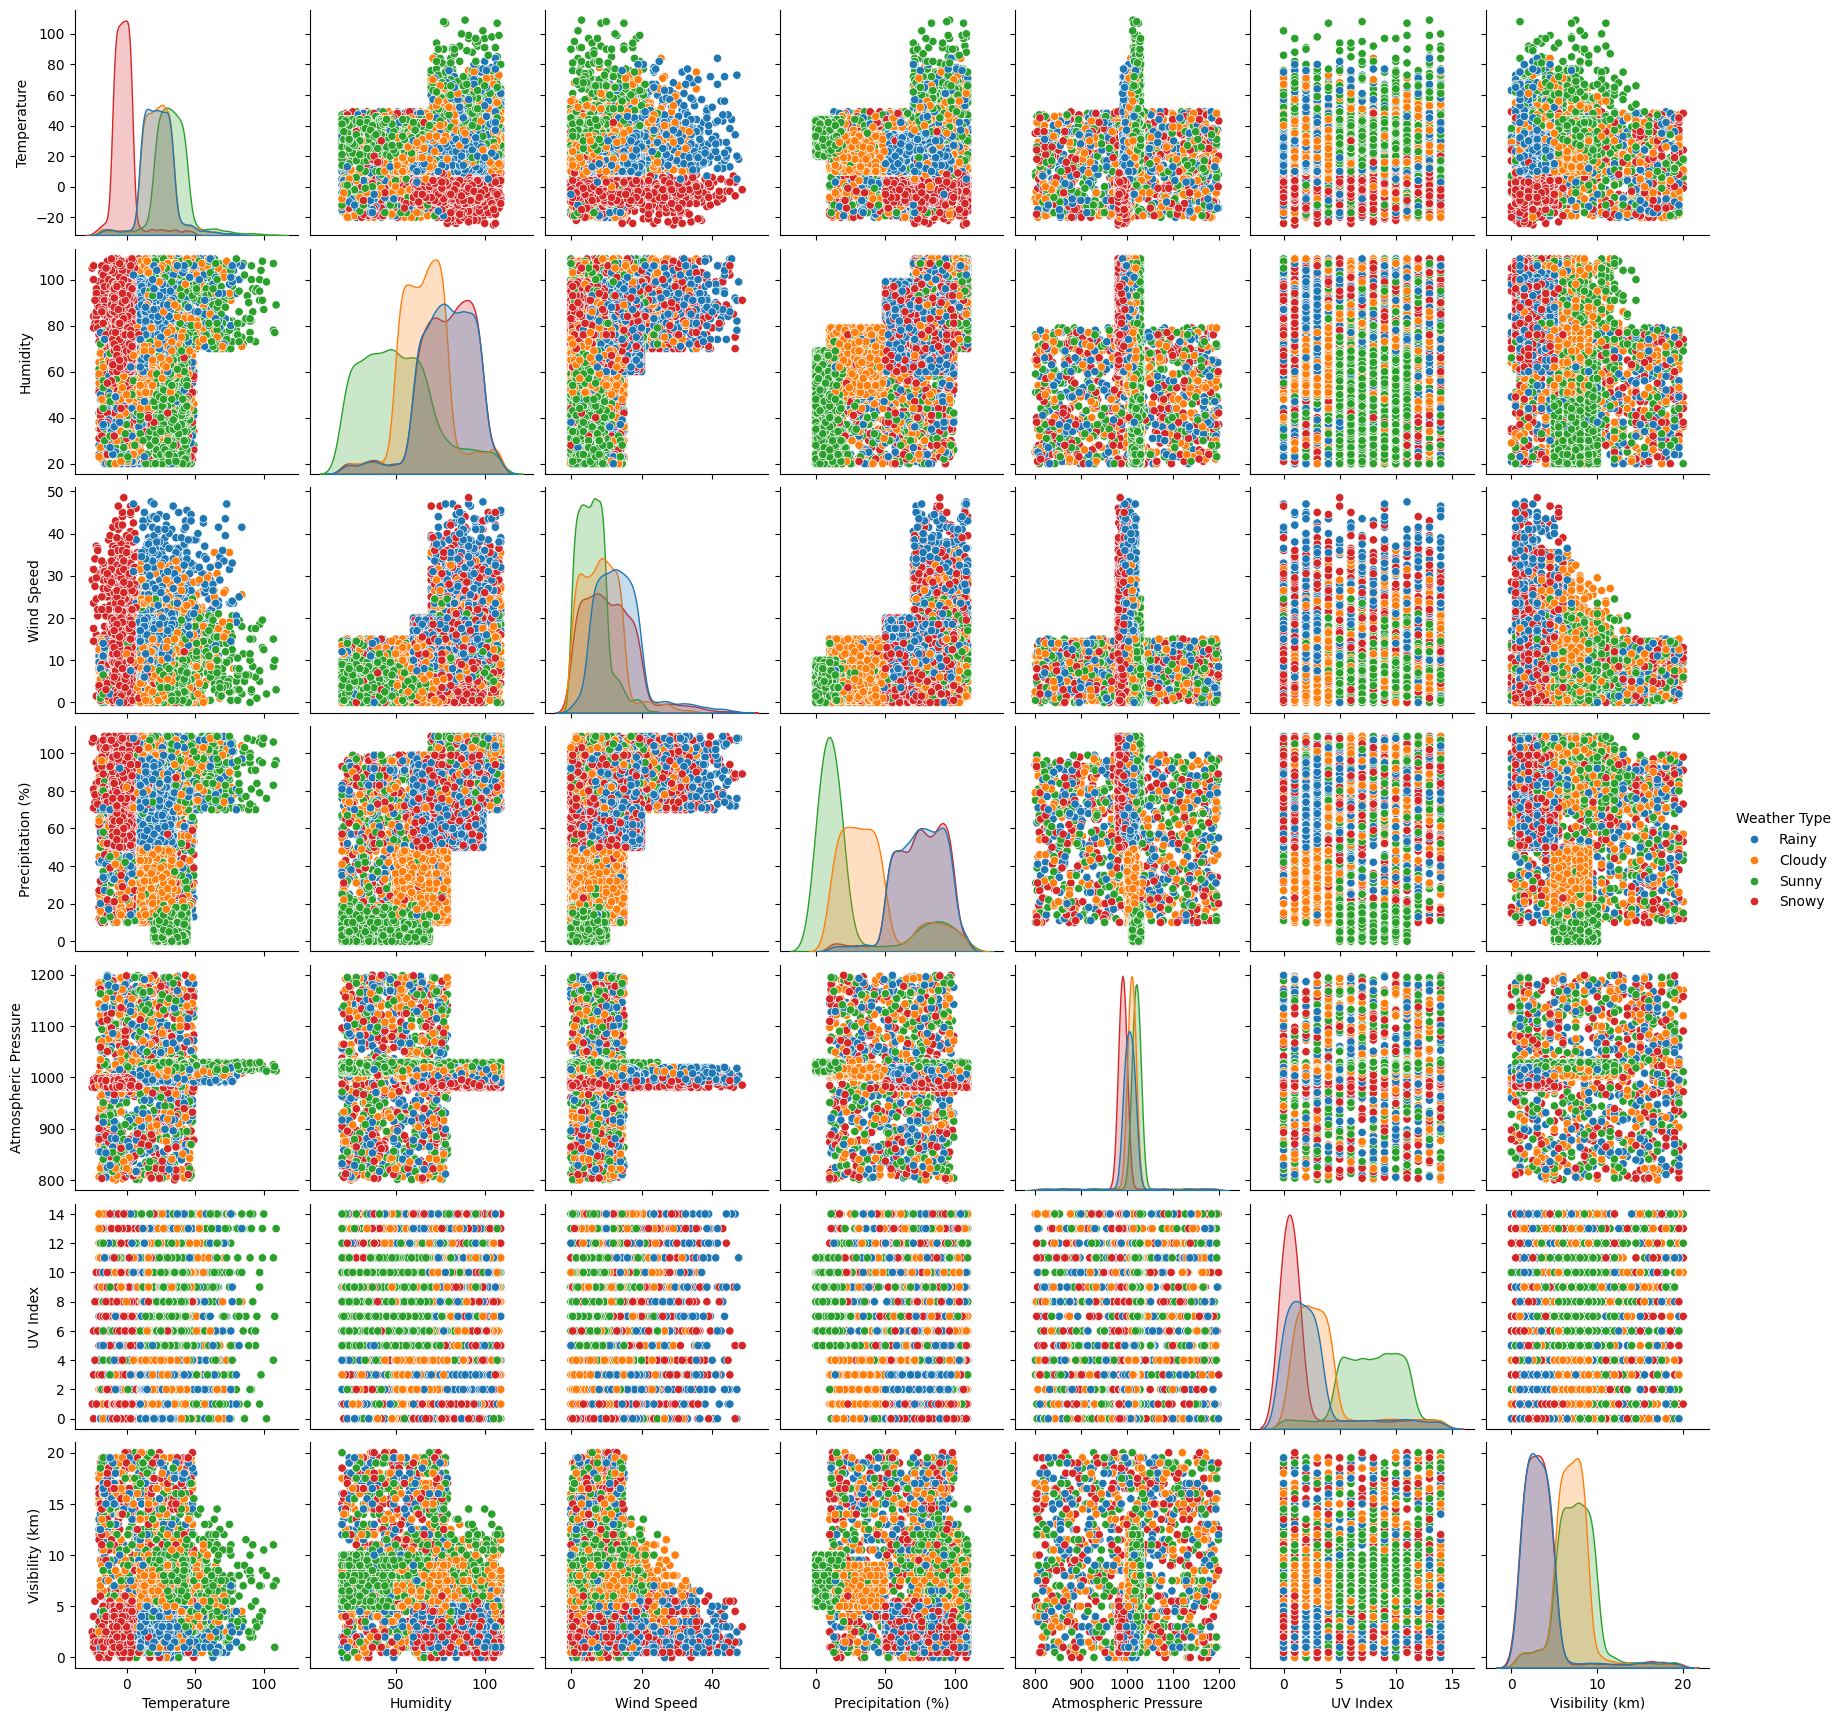

In [14]:
sns.pairplot(cuaca, hue='Weather Type')
plt.show()


Berdasarkan visualisasi data diatas, tidak terlihat adanya hubungan yang signifikan antara fitur dengan target `Weather Type`

# Data Preparation

Data preparation merupakan tahapan penting dalam proses pengembangan model machine learning. Ini adalah tahap di mana kita melakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan.

## Menangani Outliers


Outlier adalah titik data yang secara signifikan berada di sebgaian data dalam kumpulan data. Outlier ini bisa muncul karena banyak faktor salah satunya adalah kesalahan pengamatan.

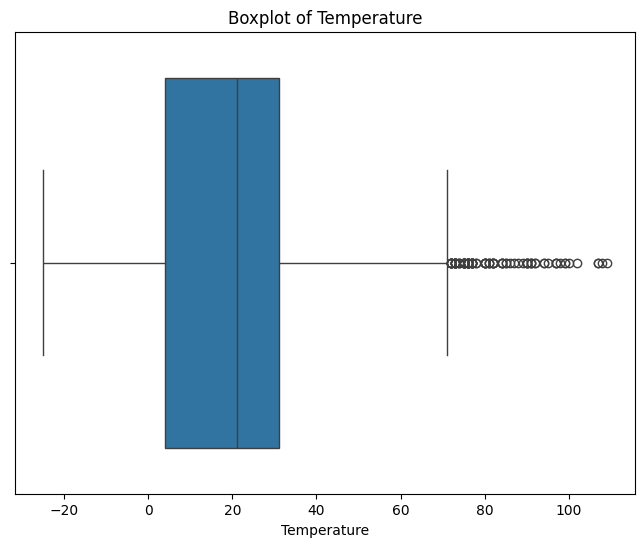

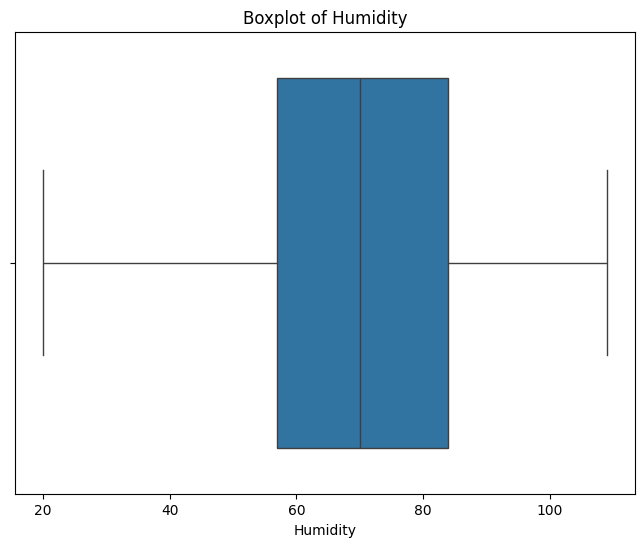

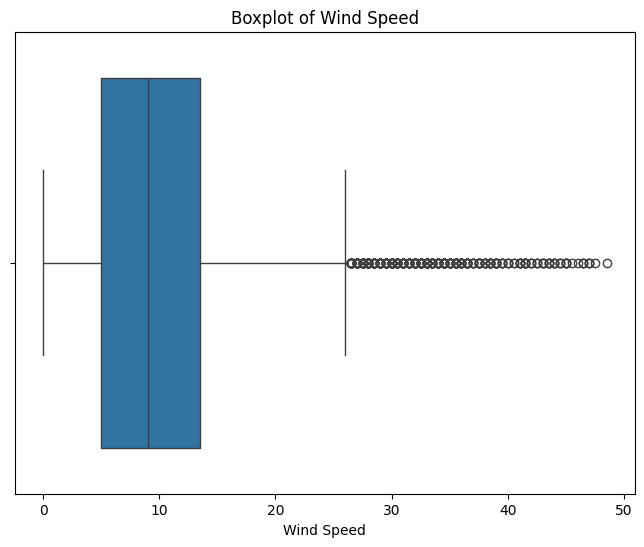

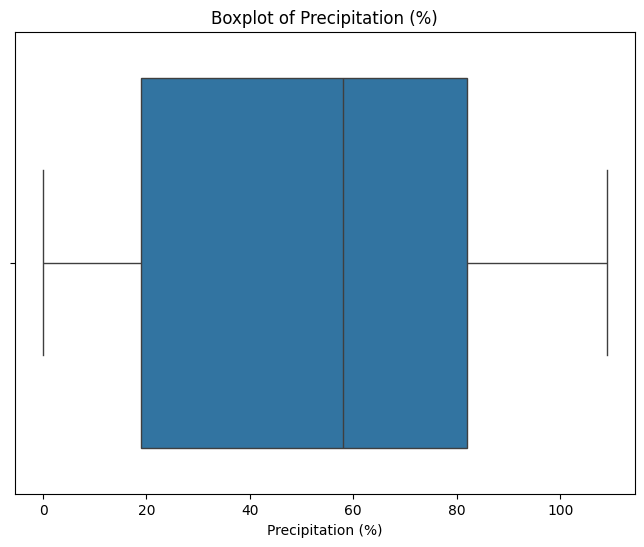

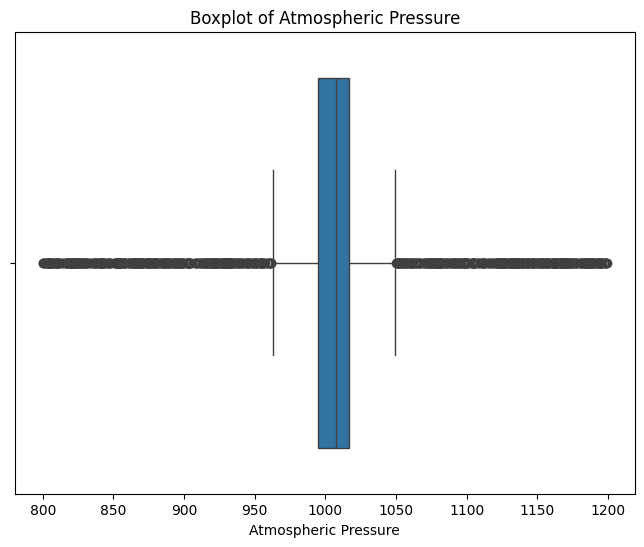

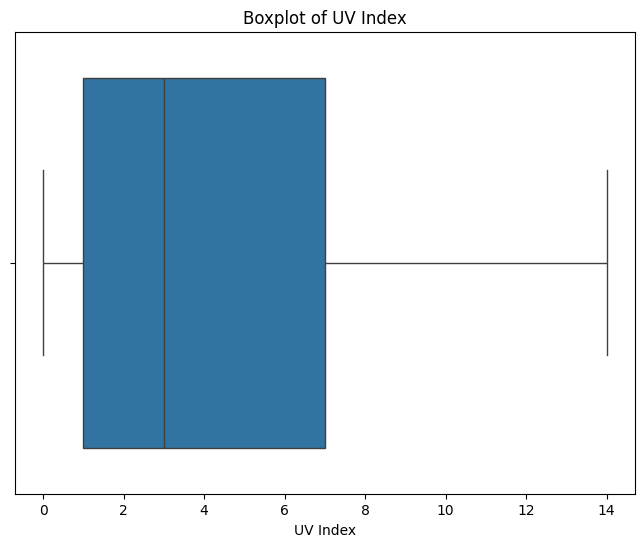

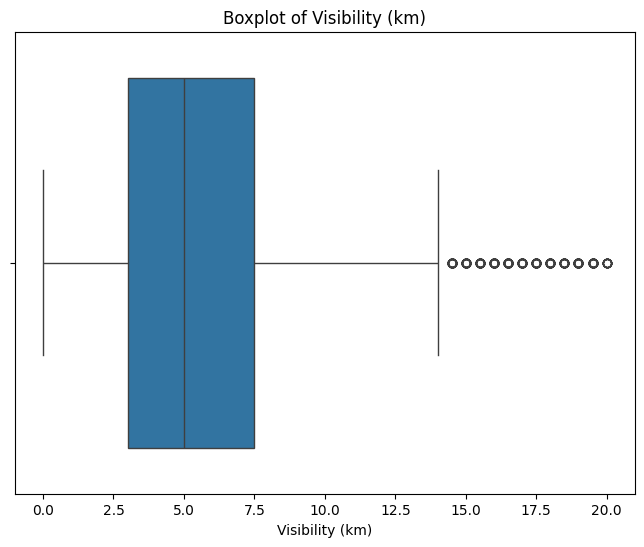

In [15]:
#menampilkan data outlier
for column in cuaca.select_dtypes(include=np.number).columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=cuaca[column])
  plt.title(f'Boxplot of {column}')
  plt.show()


Berdasarkan boxplot diatas, ada 4 fitur yang memiliki outlier yakni fitur `Temperature`, `Wind Speed`, `Athmospheric Pressure` dan `Visibility (km)`

Outlier perlu dihapus untuk mendapatkan model yang bagus


In [16]:
# Pilih yang numerik saja
numeric_cuaca = cuaca.select_dtypes(include=np.number)

Q1 = numeric_cuaca.quantile(0.25)
Q3 = numeric_cuaca.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cuaca = cuaca[~((numeric_cuaca < lower_bound) | (numeric_cuaca > upper_bound)).any(axis=1)]

Outlier telah dihapus

In [17]:
cuaca.shape

(11689, 11)

Jumlah data sekarang menjadi 11689 dari 13200 data

## Mengubah Type data

In [18]:
# ubah semua data kategori menjadi numerik
le = LabelEncoder()
cuaca['Cloud Cover'] = le.fit_transform(cuaca['Cloud Cover'])
cuaca['Location'] = le.fit_transform(cuaca['Location'])
cuaca['Season'] = le.fit_transform(cuaca['Season'])
cuaca['Weather Type'] = le.fit_transform(cuaca['Weather Type'])
cuaca.head()

Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
0         14.0        73         9.5               82.0            3   
1         39.0        96         8.5               71.0            3   
2         30.0        64         7.0               16.0            0   
3         38.0        83         1.5               82.0            0   
4         27.0        74        17.0               66.0            2   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2       3              3.5         1   
1               1011.43         7       1             10.0         1   
2               1018.72         5       1              5.5         2   
3               1026.25         7       1              1.0         0   
4                990.67         1       3              2.5         2   

   Weather Type  
0             1  
1             0  
2             3  
3             3  
4             1

- Mengubah semua data kategorik menjadi numerik untuk mempermudah permodelan

In [19]:
# update data
cuaca.describe()

Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  11689.000000  11689.000000  11689.000000       11689.000000   
mean      19.093678     69.505005      9.216956          52.006502   
std       15.920637     19.415532      5.615114          32.056549   
min      -24.000000     20.000000      0.000000           0.000000   
25%        7.000000     59.000000      5.000000          18.000000   
50%       22.000000     70.000000      8.500000          56.000000   
75%       30.000000     84.000000     13.500000          81.000000   
max       71.000000    109.000000     26.000000         109.000000   

        Cloud Cover  Atmospheric Pressure      UV Index        Season  \
count  11689.000000          11689.000000  11689.000000  11689.000000   
mean       1.986911           1006.263816      3.613483      1.877492   
std        1.032621             12.937577      3.601013      1.162623   
min        0.000000            962.880000      0.000000      0.000000   
25%        2.000000            995.830000      1.000000      1.000000   
50%        2.000000           1007.900000      2.000000      2.000000   
75%        3.000000           1016.290000      6.000000      3.000000   
max        3.000000           1049.200000     14.000000      3.000000   

       Visibility (km)      Location  Weather Type  
count     11689.000000  11689.000000  11689.000000  
mean          5.106553      1.103174      1.499444  
std           2.605640      0.788325      1.126809  
min           0.000000      0.000000      0.000000  
25%           3.000000      0.000000      0.000000  
50%           5.000000      1.000000      2.000000  
75%           7.500000      2.000000      3.000000  
max          14.000000      2.000000      3.000000

In [20]:
# cek data lagi
cuaca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11689 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           11689 non-null  float64
 1   Humidity              11689 non-null  int64  
 2   Wind Speed            11689 non-null  float64
 3   Precipitation (%)     11689 non-null  float64
 4   Cloud Cover           11689 non-null  int64  
 5   Atmospheric Pressure  11689 non-null  float64
 6   UV Index              11689 non-null  int64  
 7   Season                11689 non-null  int64  
 8   Visibility (km)       11689 non-null  float64
 9   Location              11689 non-null  int64  
 10  Weather Type          11689 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.1 MB


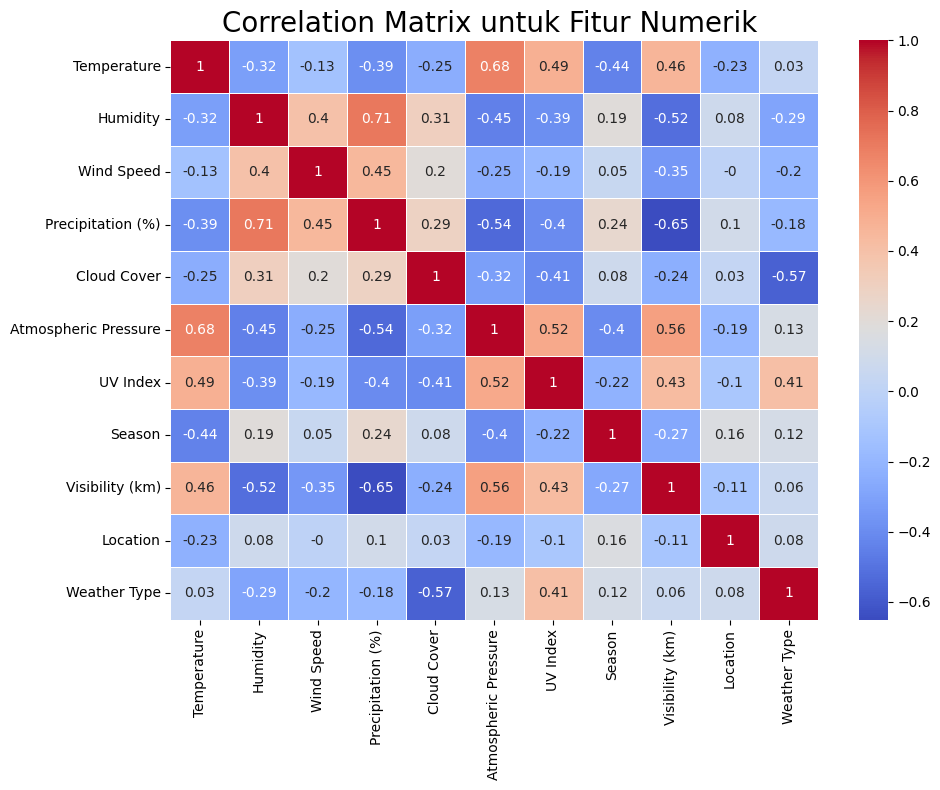

In [21]:
# Mengetahui skor korelasi
plt.figure(figsize=(10, 8))
correlation_matrix = cuaca.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)
plt.tight_layout()

Berdasarkan nilai korelasi di atas
- `Temperature`, `Visibilty (km)`, dan `Location` adalah fitur yang mempunyai nilai korelasi paling kecil dengan target `Weather Type` dan akan di hapus

## Hapus Kolom dengan Korelasi Terendah

bagian ini adalah proses penghapusan fitur-fitur yang memiliki korelasi rendah terhadap variabel target dari dataset. Langkah ini diambil berdasarkan asumsi bahwa fitur dengan korelasi rendah tidak memberikan kontribusi signifikan terhadap prediksi yang dibuat oleh model.

In [22]:
# Ada beberapa yang tidak memilik korelasi dengan Weather Type, maka dihilangkan
cuaca.drop(['Temperature', 'Visibility (km)', 'Location'], inplace=True, axis=1)
cuaca.head()

Humidity  Wind Speed  Precipitation (%)  Cloud Cover  Atmospheric Pressure  \
0        73         9.5               82.0            3               1010.82   
1        96         8.5               71.0            3               1011.43   
2        64         7.0               16.0            0               1018.72   
3        83         1.5               82.0            0               1026.25   
4        74        17.0               66.0            2                990.67   

   UV Index  Season  Weather Type  
0         2       3             1  
1         7       1             0  
2         5       1             3  
3         7       1             3  
4         1       3             1

In [23]:
cuaca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11689 entries, 0 to 13199
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Humidity              11689 non-null  int64  
 1   Wind Speed            11689 non-null  float64
 2   Precipitation (%)     11689 non-null  float64
 3   Cloud Cover           11689 non-null  int64  
 4   Atmospheric Pressure  11689 non-null  float64
 5   UV Index              11689 non-null  int64  
 6   Season                11689 non-null  int64  
 7   Weather Type          11689 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 821.9 KB


Penghapusan fitur `Temperature` ,`Visibilty (km)`, `Location` karena memiliki nilai korelasi yang rendah. Berdasarkan data terbaru, tersisa 8 kolom

## Train-Test-Split

Train-Test-Split adalah metode untuk membagi dataset menjadi data latih (train) dan data uji (test). Biasanya data akan dibagi dengan proporsi tertentu. Dalam kasus ini saya akan membagi data menjadi 90:10 dimana 90% untuk training dan 10% untuk testing

In [24]:
# Membagi 90:10 (10% untuk data uji/test)
X = cuaca.drop(['Weather Type'],axis =1)
y = cuaca['Weather Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [25]:
# cek jumlah sampel
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 11689
Total # of sample in train dataset: 10520
Total # of sample in test dataset: 1169


Berdasarkan output diatas kita telah sukses melakukan proses Train-Test-Split, terlihat bahwa:
- Dataset train memiliki 10520 data
- Dataset test memiliki 1169 data

## Standarisasi

Standardisasi adalah teknik transformasi yang paling umum digunakan dalam tahap persiapan pemodelan. Untuk fitur numerik, kita tidak akan melakukan transformasi dengan one-hot-encoding seperti pada fitur kategori. Kita akan menggunakan teknik StandarScaler dari library Scikitlearn.

StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi.  StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.

Pada kasus ini kita hanya akan melakukan standarisai pada data latih dan data uji.

In [26]:
# Standarisasi data latih (train) dengan StandardCaler
scaler = StandardScaler()
X_train[:] = scaler.fit_transform(X_train[:])
X_train.head()

<ipython-input-26-f2d32ff28ab1>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.79547332  1.007657   -0.58940128 ...  0.49247691 -0.53788327
  1.41980107]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train[:] = scaler.fit_transform(X_train[:])
<ipython-input-26-f2d32ff28ab1>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.91935244  0.01470768  0.01470768 ...  0.01470768  0.98173774
 -1.91935244]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train[:] = scaler.fit_transform(X_train[:])
<ipython-input-26-f2d32ff28ab1>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.65852809 -0.72867967 -0.45123811 ... -1.00612122 -0.72867967
  2.32317741]' has dtype incompatible with int

Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
5908 -0.795473   -1.373182          -1.463063    -1.919352   
2175  1.007657    0.315739           0.531440     0.014708   
621  -0.589401   -0.306495          -1.120258     0.014708   
2363  1.059175   -0.662057           1.092394    -1.919352   
3887 -1.671279   -1.106510          -1.182586    -1.919352   

      Atmospheric Pressure  UV Index    Season  
5908              1.492121  0.658528 -0.753285  
2175              0.757302 -0.728680  0.966641  
621               1.014102 -0.451238 -1.613249  
2363              1.706378  2.045736  0.966641  
3887              0.300168  0.381087  0.966641

In [27]:
# mengecek nilai mean dan standar deviasi pada setelah proses standarisasi
X_train.describe().round(4)

Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
count  10520.0000  10520.0000         10520.0000   10520.0000   
mean       0.0000     -0.0000            -0.0000      -0.0000   
std        1.0000      1.0000             1.0000       1.0000   
min       -2.5471     -1.6399            -1.6189      -1.9194   
25%       -0.5379     -0.7509            -1.0579       0.0147   
50%        0.0288     -0.1287             0.1263       0.0147   
75%        0.7501      0.7602             0.9054       0.9817   
max        2.0380      2.9825             1.7780       0.9817   

       Atmospheric Pressure    UV Index      Season  
count            10520.0000  10520.0000  10520.0000  
mean                -0.0000      0.0000      0.0000  
std                  1.0000      1.0000      1.0000  
min                 -3.3554     -1.0061     -1.6132  
25%                 -0.8084     -0.7287     -0.7533  
50%                  0.1312     -0.4512      0.1067  
75%                  0.7751      0.6585      0.9666  
max                  3.3214      2.8781      0.9666

Seperti yang disebutkan sebelumnya, proses ini akan mengubah nilai rata-rata (mean) menjadi 0 dan standar deviasi menjadi 1.

In [28]:
# Standarisasi data latih (test) dengan StandardCaler
X_test[:] = scaler.fit_transform(X_test[:])
X_test.head()

<ipython-input-28-a31dd9c5c259>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.97299356  0.04712504  0.20143646 ...  0.92155642 -0.2614978
  0.97299356]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test[:] = scaler.fit_transform(X_test[:])
<ipython-input-28-a31dd9c5c259>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.00587852 -0.9875911  -1.96930369 ... -0.00587852  0.97583407
 -0.00587852]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test[:] = scaler.fit_transform(X_test[:])
<ipython-input-28-a31dd9c5c259>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.7000184  0.421354  -0.9803615 ... -0.1393322 -0.9803615 -0.4196753]' has dtype incompatible with int64, please e

Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
7259   0.972994    0.424815           1.368710    -0.005879   
6013   0.047125   -0.842505          -0.898904    -0.987591   
11517  0.201436    1.601611           1.463194    -1.969304   
1452   1.384491   -0.389891          -0.017054    -0.005879   
6753  -0.158624    1.511088           0.770312     0.975834   

       Atmospheric Pressure  UV Index    Season  
7259              -0.599656 -0.700018  0.955664  
6013               0.602839  0.421354  0.955664  
11517              1.692384 -0.980361  0.093649  
1452              -1.605448 -0.980361  0.955664  
6753              -0.050273 -0.139332 -1.630381

In [29]:
# mengecek nilai mean dan standar deviasi pada setelah proses standarisasi
X_test.describe().round(4)

Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
count  1169.0000   1169.0000          1169.0000    1169.0000   
mean     -0.0000      0.0000            -0.0000       0.0000   
std       1.0004      1.0004             1.0004       1.0004   
min      -2.5762     -1.6572            -1.6548      -1.9693   
25%      -0.5187     -0.7520            -1.0564      -0.0059   
50%       0.0471     -0.1183             0.1089      -0.0059   
75%       0.7672      0.7869             0.8648       0.9758   
max       2.0017      2.8689             1.7781       0.9758   

       Atmospheric Pressure   UV Index     Season  
count             1169.0000  1169.0000  1169.0000  
mean                 0.0000    -0.0000     0.0000  
std                  1.0004     1.0004     1.0004  
min                 -3.1622    -0.9804    -1.6304  
25%                 -0.7894    -0.7000    -0.7684  
50%                  0.0988    -0.4197     0.0936  
75%                  0.7765     0.4214     0.9557  
max                  3.2476     2.9444     0.9557

# Model Deployment

Pada tahap permodelan ini saya akan menggunakan 3 model yang berbeda, berikut ini adalah ketiga algoritma tersebut:
1. K-Nearest Neighbor (KNN)
  - Kelebihan
    - Sederhana dan mudah diimplementasikan
    - Non-parametrik
    - Fleksibel
  - Kekurangan
    - Lambat pada data besar
    - Sensitif terhadap fitur skala
    - Rentan terhadap outlier

2. Random Forest (RF)
  - Kelebihan
    - Akurasi tinggi
    - Resisten terhadap overfitting
    - Dapat menangani data yang hilang dan fitur penting
  - Kekurangan
    - Kurang interpretatif
    - Lambat dalam prediksi

3. Boosting Algorithm
  - Kelebihan
    - Akurasi sangat tinggi
    - Bagus untuk data tidak seimbang
    - Mengurangi bias
  - Kekurangan
    - Lebih rentan terhadap overfitting
    - Waktu pelatihan yang lama
    - Memerlukan tuning parameter

Pada tahap ini kita hanya melatih data training dan menyimpan data testing dari semua model untuk tahap evaluasi yang akan dibahas di Modul Evaluasi Model

## Model K-Nearest Neighbor (K-NN)


In [30]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

pada tahapan ini kita akan melatih data dengan KNN, kita menggunakan `n_neighbors`= 10 tetangga dan metric Euclidean untuk mengukur jarak antara titik.

## Model Random Forest

In [31]:
RF = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
RF_predictions = RF.predict(X_test)

Berikut adalah parameter-parameter yang digunakan:

- `n_estimator`: jumlah trees (pohon) di forest. Di sini kita set `n_estimator`=50.
- `max_depth`: ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan. Di sini kita set `max_depth`=16.
- `random_state`: digunakan untuk mengontrol random number generator yang digunakan. Di sini kita set `random_state`=55.
- `n_jobs`:  komponen untuk mengontrol thread atau proses yang berjalan secara paralel.  Di sini kita set `n_job`s=-1 artinya semua proses berjalan secara paralel.

## Model Boosting Algorithm

In [32]:
boosting = AdaBoostClassifier(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
boosting_predictions = boosting.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


kita akan menggunakan metode adaptive boosting. Salah satu metode adaptive boosting yang terkenal adalah AdaBoost.

Berikut merupakan parameter-parameter yang digunakan pada potongan kode di atas.

- `learning_rate`: bobot yang diterapkan pada setiap regressor di masing-masing proses iterasi boosting.
- `random_state`: digunakan untuk mengontrol random number generator yang digunakan.

# Evaluasi Model

Pada proses evaluasi kita akan menggunakan metrik Accuracy, Precision, Recall dan F1-Score untuk menentukan peforma mana yang terbaik

Selanjutnya adalah melakukan evaluasi pada ketiga model.

In [33]:
evaluasi = pd.DataFrame(columns=['train', 'test'], index = ['KNN', 'RF', 'Boosting'])

model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

for name, model in model_dict.items():
    evaluasi.loc[name, 'train'] = metrics.accuracy_score(y_true=y_train, y_pred=model.predict(X_train))
    evaluasi.loc[name, 'test'] = metrics.accuracy_score(y_true=y_test, y_pred=model.predict(X_test))

In [34]:
evaluasi = evaluasi.applymap(lambda x: "{:.2f}%".format(x * 100))
print(evaluasi)


           train    test
KNN       94.12%  92.13%
RF        99.05%  94.78%
Boosting  80.14%  81.27%


<ipython-input-34-5ce6c40e6456>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  evaluasi = evaluasi.applymap(lambda x: "{:.2f}%".format(x * 100))


<ipython-input-35-160ef41ea520>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values, y=list(models.keys()), ax=axes[i], palette=colors)
<ipython-input-35-160ef41ea520>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values, y=list(models.keys()), ax=axes[i], palette=colors)
<ipython-input-35-160ef41ea520>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values, y=list(models.keys()), ax=axes[i], palette=colors)
<ipython-input-35-160ef41ea520>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

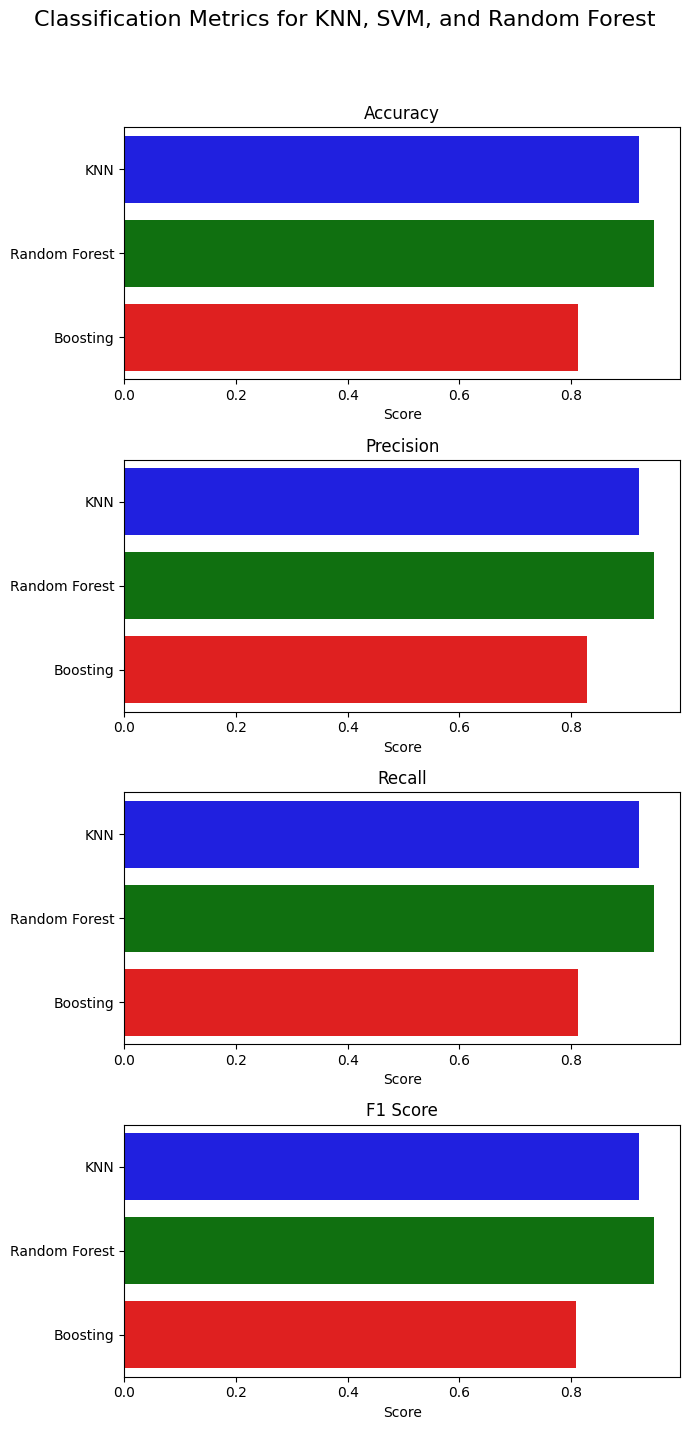

In [35]:
y_true = y_test

models = {
    'KNN': knn_predictions,
    'Random Forest': RF_predictions,
    'Boosting': boosting_predictions
}
# Define a function to calculate metrics
def calculate_metrics(y_true, y_pred):
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred, average='weighted')
    recall = metrics.recall_score(y_true, y_pred, average='weighted')
    f1 = metrics.f1_score(y_true, y_pred, average='weighted')
    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Calculate metrics for each model
model_metrics = {model: calculate_metrics(y_true, predictions) for model, predictions in models.items()}

colors = ['blue', 'green', 'red']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(7, 15))
fig.suptitle('Classification Metrics for KNN, SVM, and Random Forest', fontsize=16)

# Metrics to plot
metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Plotting each metric in its own subplot
for i, metric in enumerate(metrics_list):
    values = [model_metrics[model][metric] for model in models]
    sns.barplot(x=values, y=list(models.keys()), ax=axes[i], palette=colors)
    axes[i].set_title(metric)
    axes[i].set_xlabel('Score')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Selanjutnya kita akan melihat nilai akurasi di tiap model

In [36]:
# Calculate metrics for each model
model_metrics = {model: calculate_metrics(y_true, predictions) for model, predictions in models.items()}

# Print the metrics for each model
for model, metrics in model_metrics.items():
    print(f"Model: {model}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print("-" * 20)


Model: KNN
Accuracy: 0.9213
Precision: 0.9212
Recall: 0.9213
F1 Score: 0.9210
--------------------
Model: Random Forest
Accuracy: 0.9478
Precision: 0.9480
Recall: 0.9478
F1 Score: 0.9476
--------------------
Model: Boosting
Accuracy: 0.8127
Precision: 0.8286
Recall: 0.8127
F1 Score: 0.8095
--------------------


Berdasarkan visualisasi dan nilai data diatas, terlihat bahwa model `Random Forest` memiliki performa terbaik daripada model `K-Nearest Neighbors` dan
`Boosting Algorithm` pada `Accuracy` dengan nilai 94,78%, `Precision` dengan
nilai 94,8%, `Recall` dengan nilai 94,78%, dan `F1 Score` dengan nilai 94,76%.

Selanjutnya kita uji prediksinya menggunakan beberapa nilai dalam data

In [164]:
# Dictionary untuk mapping angka ke label cuaca
weather_mapping = {0: 'Cloudy', 1: 'Rainy', 2: 'Snowy', 3: 'Sunny'}

# Pilih data prediksi secara acak
prediksi = X_test.sample(n=1, random_state=None).copy()  # n=1 untuk mengambil 1 baris secara acak

# Ambil y_test yang sesuai dengan indeks yang dipilih
y_true_sample = y_test.loc[prediksi.index]

# Dictionary untuk menyimpan hasil prediksi dan nilai asli
pred_dict = {'y_true': y_true_sample}

# Loop melalui setiap model dan prediksi
for name, model in model_dict.items():
    # Prediksi hasil
    pred = model.predict(prediksi).round().astype(int)  # Bulatkan dan ubah ke integer
    # Ubah angka prediksi menjadi nama cuaca
    pred_dict['prediksi_' + name] = [weather_mapping.get(p, 'Unknown') for p in pred]

# Ubah y_true menjadi nama cuaca juga
pred_dict['y_true'] = [weather_mapping.get(y, 'Unknown') for y in y_true_sample.round().astype(int)]

# Tampilkan hasil dalam DataFrame
pd.DataFrame(pred_dict)


y_true prediksi_KNN prediksi_RF prediksi_Boosting
0  Rainy        Snowy       Rainy             Snowy

Berdasarkan prediksinya juga, `Random forest` memiliki hasil prediksi terbaik